Sampada Bhosale posted this data set in kaggle 6 years ago.
he dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN.

*   List item
*   List item



In [ ]:
# import all necessary things
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


Each connection record consists of about 100 bytes.
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:
• Normal
• Anomalous

In [ ]:
# for taking dataset to use in colab
from google.colab import files
uploaded = files.upload()

Saving Test_data.csv to Test_data.csv


Load;Inspect and Explore  Data:

In [ ]:
# reading both data
da1=pd.read_csv('Train_data.csv')
da2=pd.read_csv('Test_data.csv')

In [ ]:
# seeing how our data look like from train data
da1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# combining two dataset
data = pd.concat([da1, da2])

data=data.reset_index(drop=True)

In [ ]:
# looking for combined data
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# checking for object and numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47736 entries, 0 to 47735
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     47736 non-null  int64  
 1   protocol_type                47736 non-null  object 
 2   service                      47736 non-null  object 
 3   flag                         47736 non-null  object 
 4   src_bytes                    47736 non-null  int64  
 5   dst_bytes                    47736 non-null  int64  
 6   land                         47736 non-null  int64  
 7   wrong_fragment               47736 non-null  int64  
 8   urgent                       47736 non-null  int64  
 9   hot                          47736 non-null  int64  
 10  num_failed_logins            47736 non-null  int64  
 11  logged_in                    47736 non-null  int64  
 12  num_compromised              47736 non-null  int64  
 13  root_shell      

In [ ]:
# unique value and value count in class
data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [ ]:
# seeing how object  dataset look like
data.describe(include='object')

,protocol_type,service,flag,class
count,47736,47736,47736,25192
unique,3,67,11,2
top,tcp,http,SF,normal
freq,39406,15856,29848,13449


As I review the dataset containing information about protocol types, services, flags, and classes, several key observations emerge:

    Protocol Type Distribution:
        The dataset comprises three unique protocol types, with "tcp" being the most prevalent, appearing 39,406 times.
        This suggests that TCP (Transmission Control Protocol) is the predominant protocol type within the dataset.

    Service Distribution:
        Across the 67 unique services listed, "http" stands out as the most frequent, occurring 15,856 times.
        The prevalence of HTTP services indicates a significant portion of network traffic involving web-based communications.

    Flag Distribution:
        The dataset includes 11 unique flags, with "SF" being the most common, appearing 29,848 times.
        The prevalence of the "SF" flag suggests a large proportion of connections with the "SF" (SYN-FIN) flag combination, typically indicating a normal, established connection in TCP.

    Class Distribution:
        The "class" column indicates the class or label assigned to each data instance.
        Among the instances where the class is provided (25,192 instances), "normal" appears most frequently, occurring 13,449 times.
        This suggests that a significant portion of the dataset represents normal network traffic.

Overall, this summary provides valuable insights into the distribution and prevalence of different protocol types, services, flags, and classes within the dataset. Understanding these distributions is essential for further analysis, such as anomaly detection or classification tasks, aimed at identifying and classifying network activities accurately.


Label encoder


converting text format into some numerical value,
it is effective if the columns have similar pattern of things

In [ ]:

label_encoder = LabelEncoder()

# Perform label encoding for 'protocol_type' column
data['protocol_type'] = label_encoder.fit_transform(data['protocol_type'])

# Perform label encoding for 'service' column
data['service'] = label_encoder.fit_transform(data['service'])

# Perform label encoding for 'flag' column
data['flag'] = label_encoder.fit_transform(data['flag'])

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# checking for shape
data.shape

(47736, 42)

In [ ]:
# looking for null value
data.isnull().sum()

duration                           0
protocol_type                      0
service                            0
flag                               0
src_bytes                          0
dst_bytes                          0
land                               0
wrong_fragment                     0
urgent                             0
hot                                0
num_failed_logins                  0
logged_in                          0
num_compromised                    0
root_shell                         0
su_attempted                       0
num_root                           0
num_file_creations                 0
num_shells                         0
num_access_files                   0
num_outbound_cmds                  0
is_host_login                      0
is_guest_login                     0
count                              0
srv_count                          0
serror_rate                        0
srv_serror_rate                    0
rerror_rate                        0
s

In [ ]:
# droping null value
data=data.dropna()

In [ ]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# checking for shape after dropping null value
data.shape

(25192, 42)

Feature Selection


In [ ]:
# splitting the data into training and testing
X=data.drop('class',axis=1)
y=data['class']

In [ ]:
# train test split
#  Splitting the dataset into training and testing sets using train_test_split function from sklearn.model_selection module.
# X: Features data
# y: Target data
# test_size: Specifies the proportion of the dataset to include in the test split (here, 33% of the data)
# random_state: Controls the shuffling applied to the data before splitting. Setting it to a fixed value (here, 42) ensures reproducibility of results.
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
# using decision tree to see feature importance
clf = DecisionTreeClassifier(random_state=0,max_depth=3).fit(X_train,y_train)
clf.feature_importances_

# we can see rough istimation of which features are more likely important

array([0.        , 0.07295556, 0.        , 0.        , 0.82747721,
       0.02403337, 0.        , 0.        , 0.        , 0.02671567,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04881819, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
feature_importances = clf.feature_importances_

# Create a dictionary to map feature names to their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Print feature importance scores
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

duration: 0.0
protocol_type: 0.07295555942528759
service: 0.0
flag: 0.0
src_bytes: 0.8274772087986384
dst_bytes: 0.024033365011785445
land: 0.0
wrong_fragment: 0.0
urgent: 0.0
hot: 0.026715674256610956
num_failed_logins: 0.0
logged_in: 0.0
num_compromised: 0.0
root_shell: 0.0
su_attempted: 0.0
num_root: 0.0
num_file_creations: 0.0
num_shells: 0.0
num_access_files: 0.0
num_outbound_cmds: 0.0
is_host_login: 0.0
is_guest_login: 0.0
count: 0.0
srv_count: 0.0
serror_rate: 0.0
srv_serror_rate: 0.0
rerror_rate: 0.0
srv_rerror_rate: 0.0
same_srv_rate: 0.0
diff_srv_rate: 0.0
srv_diff_host_rate: 0.0
dst_host_count: 0.0
dst_host_srv_count: 0.04881819250767759
dst_host_same_srv_rate: 0.0
dst_host_diff_srv_rate: 0.0
dst_host_same_src_port_rate: 0.0
dst_host_srv_diff_host_rate: 0.0
dst_host_serror_rate: 0.0
dst_host_srv_serror_rate: 0.0
dst_host_rerror_rate: 0.0
dst_host_srv_rerror_rate: 0.0


In [ ]:
# Not satisfied with decision tree

In [ ]:
# Now using random forest for selecting feature
clf = RandomForestClassifier(max_depth=2,random_state=0).fit(X_train,y_train)

In [ ]:
feature_importances = clf.feature_importances_

# Sort feature importances and select top 10 features
selected_features_indices = (-feature_importances).argsort()[:10]

# Map selected feature indices to column names
selected_features = X_train.columns[selected_features_indices]

print(selected_features)

Index(['same_srv_rate', 'src_bytes', 'dst_bytes', 'flag', 'logged_in',
       'diff_srv_rate', 'dst_host_srv_count', 'srv_serror_rate',
       'dst_host_same_srv_rate', 'count'],
      dtype='object')


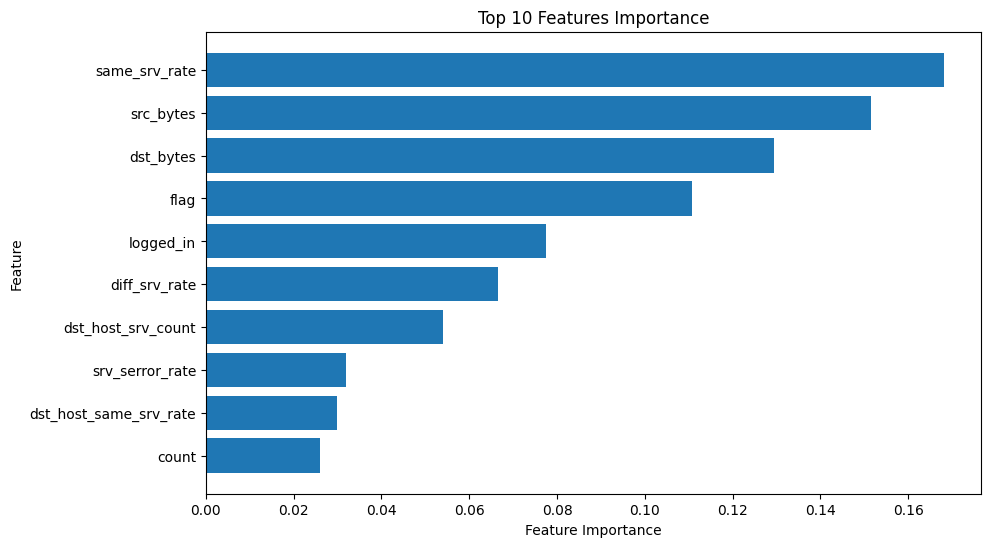

In [ ]:
# plotting the feature
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances[selected_features_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()

In [ ]:
# using only feature with high importance
data=data[['same_srv_rate', 'src_bytes', 'dst_bytes', 'flag', 'logged_in',
       'diff_srv_rate', 'dst_host_srv_count', 'srv_serror_rate',
       'dst_host_same_srv_rate', 'count','class']]

In [ ]:
data.head()

,same_srv_rate,src_bytes,dst_bytes,flag,logged_in,diff_srv_rate,dst_host_srv_count,srv_serror_rate,dst_host_same_srv_rate,count,class
0,1.00,491,0,9,0,0.00,25,0.0,0.17,2,normal
1,0.08,146,0,9,0,0.15,1,0.0,0.00,13,normal
2,0.05,0,0,5,0,0.07,26,1.0,0.10,123,anomaly
3,1.00,232,8153,9,1,0.00,255,0.2,1.00,5,normal
4,1.00,199,420,9,1,0.00,255,0.0,1.00,30,normal


Eda


In [ ]:
data.describe()

,same_srv_rate,src_bytes,dst_bytes,flag,logged_in,diff_srv_rate,dst_host_srv_count,srv_serror_rate,dst_host_same_srv_rate,count
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,0.660559,2.433063e+04,3.491847e+03,6.982455,0.394768,0.062363,115.063036,0.283762,0.519791,84.591180
std,0.439637,2.410805e+06,8.883072e+04,2.679322,0.488811,0.178550,110.646850,0.447599,0.448944,114.673451
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.090000,0.000000e+00,0.000000e+00,5.000000,0.000000,0.000000,10.000000,0.000000,0.050000,2.000000
50%,1.000000,4.400000e+01,0.000000e+00,9.000000,0.000000,0.000000,61.000000,0.000000,0.510000,14.000000
75%,1.000000,2.790000e+02,5.302500e+02,9.000000,1.000000,0.060000,255.000000,1.000000,1.000000,144.000000
max,1.000000,3.817091e+08,5.151385e+06,10.000000,1.000000,1.000000,255.000000,1.000000,1.000000,511.000000


Upon analyzing the dataset, it's evident that we're dealing with network connection data, likely sourced from a network security or traffic monitoring system. The dataset comprises various features, each providing valuable insights into the nature of network connections and activities.

Firstly, the same_srv_rate feature indicates the proportion of connections to the same service among all connections. This metric is crucial for understanding service distribution within the network and identifying patterns in service usage.

The src_bytes and dst_bytes features quantify the volume of data transmitted from the source and to the destination, respectively. These metrics are fundamental for assessing network traffic intensity and identifying potential anomalies such as unusually large or small data transfers.

The flag feature likely represents the status or type of connection, with values ranging from 0 to 10. Understanding the significance of different flags is essential for network administrators to detect suspicious or malicious activities.

The logged_in feature is binary, indicating whether users are logged into the network or not. This information is critical for monitoring user activities and identifying unauthorized access attempts.

Additionally, the diff_srv_rate feature provides insights into the diversity of services involved in network connections. Monitoring this metric helps in detecting changes in service usage patterns and potential service-based attacks.

The dst_host_srv_count feature signifies the number of services running on the destination host. Monitoring this metric enables administrators to track changes in the service landscape and detect potential service disruptions or compromises.

Furthermore, the srv_serror_rate feature indicates the error rate in the service, while the dst_host_same_srv_rate feature represents the proportion of connections to the same service among connections to the same destination host. These metrics are crucial for assessing service reliability and identifying abnormal service behaviors.

Lastly, the count feature denotes the number of connections to the same destination host as the current connection in the past two seconds. This metric provides insights into connection frequency and helps in detecting connection-based anomalies or attacks.

In conclusion, the provided dataset offers a comprehensive view of network connections and activities, empowering network administrators with valuable insights for ensuring network security and performance.


In [ ]:
# checking unique value in output
data['class'].unique()

array(['normal', 'anomaly'], dtype=object)

In [ ]:
data['class'] = label_encoder.fit_transform(data['class'])

In [ ]:
data.head()

,same_srv_rate,src_bytes,dst_bytes,flag,logged_in,diff_srv_rate,dst_host_srv_count,srv_serror_rate,dst_host_same_srv_rate,count,class
0,1.00,491,0,9,0,0.00,25,0.0,0.17,2,1
1,0.08,146,0,9,0,0.15,1,0.0,0.00,13,1
2,0.05,0,0,5,0,0.07,26,1.0,0.10,123,0
3,1.00,232,8153,9,1,0.00,255,0.2,1.00,5,1
4,1.00,199,420,9,1,0.00,255,0.0,1.00,30,1


<Axes: xlabel='flag', ylabel='count'>

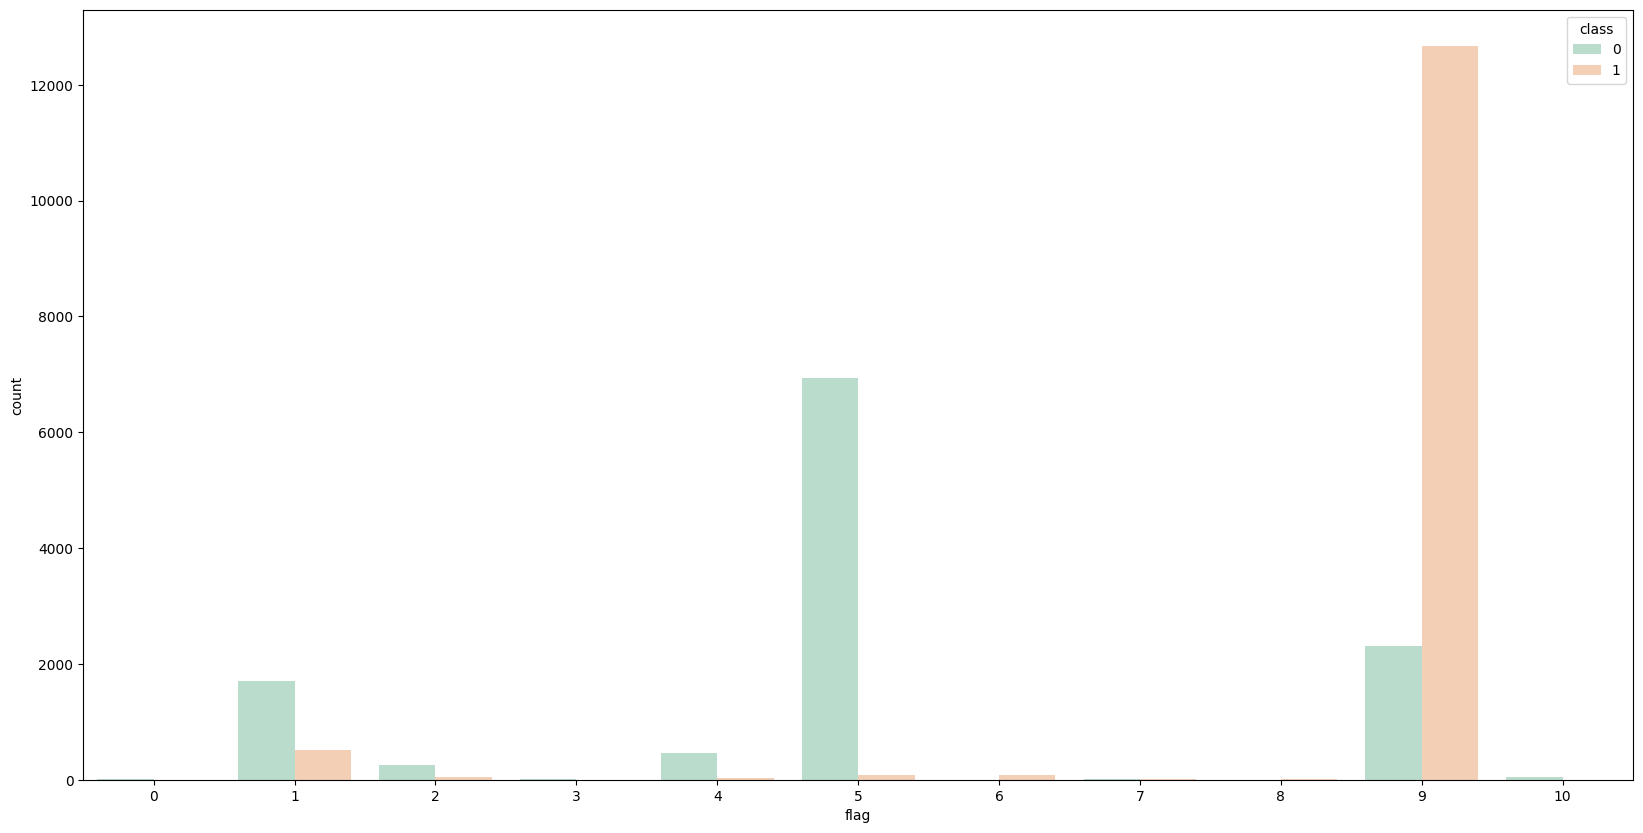

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='flag',hue='class',palette='Pastel2')

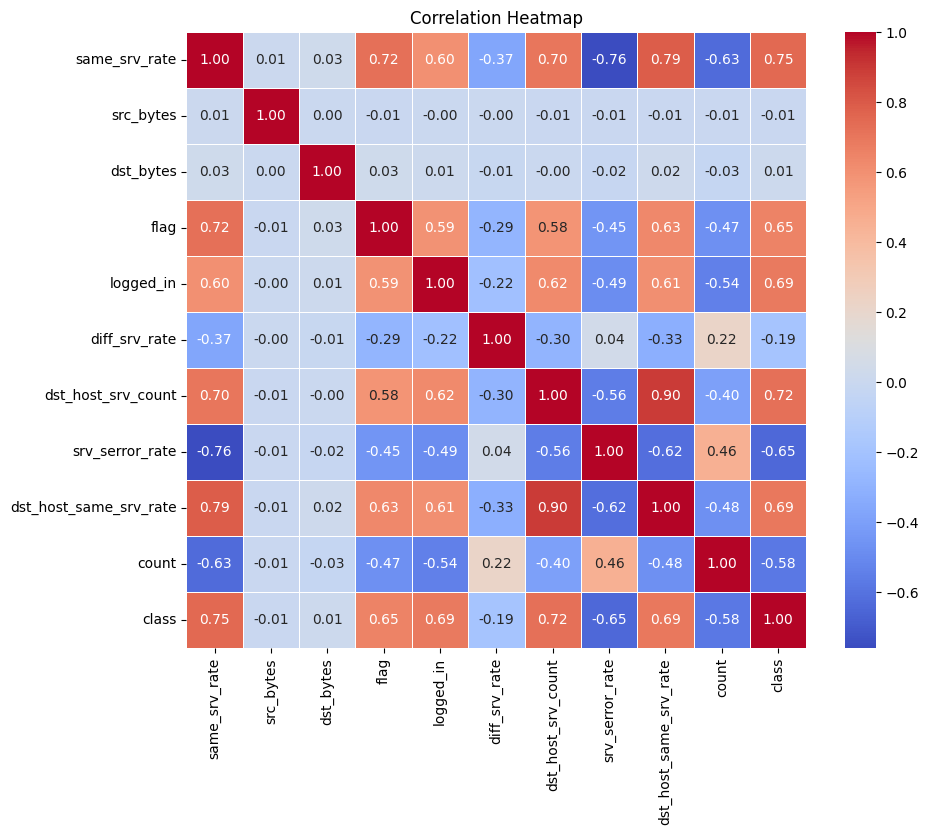

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='class', ylabel='count'>

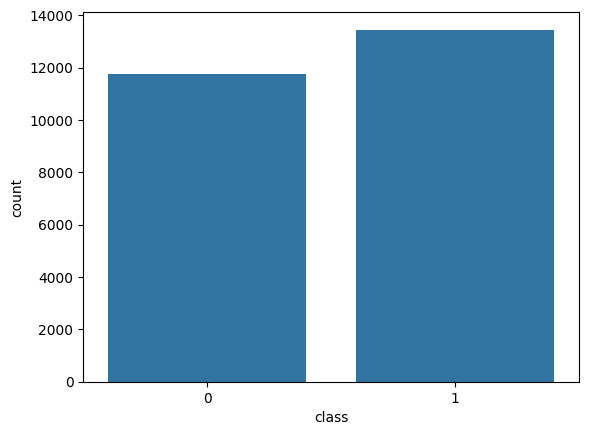

In [ ]:
sns.countplot(x=data['class'])

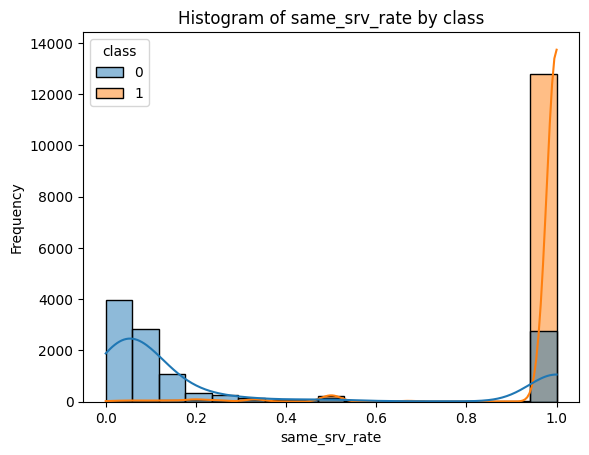

In [ ]:
# Histogram
sns.histplot(data=data, x='same_srv_rate', hue='class', kde=True)
plt.title('Histogram of same_srv_rate by class')
plt.xlabel('same_srv_rate')
plt.ylabel('Frequency')
plt.show()


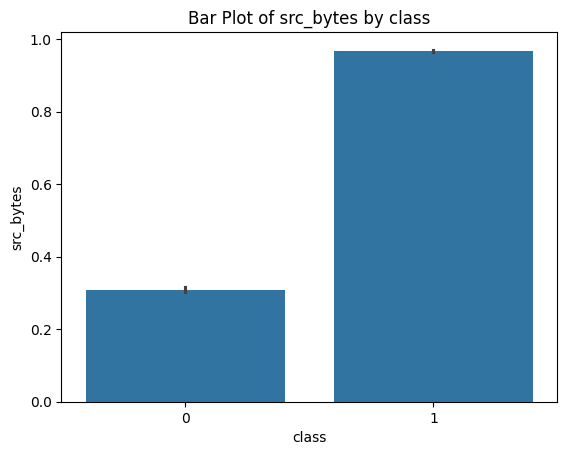

In [ ]:
sns.barplot(data=data, x='class', y='same_srv_rate')
plt.title('Bar Plot of src_bytes by class')
plt.xlabel('class')
plt.ylabel('src_bytes')
plt.show()

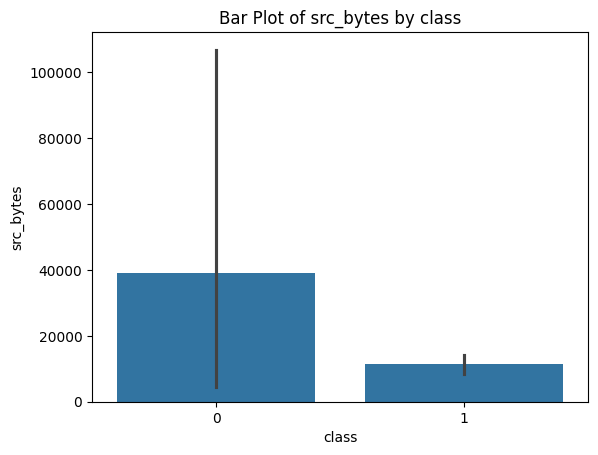

In [ ]:
sns.barplot(data=data, x='class', y='src_bytes')
plt.title('Bar Plot of src_bytes by class')
plt.xlabel('class')
plt.ylabel('src_bytes')
plt.show()

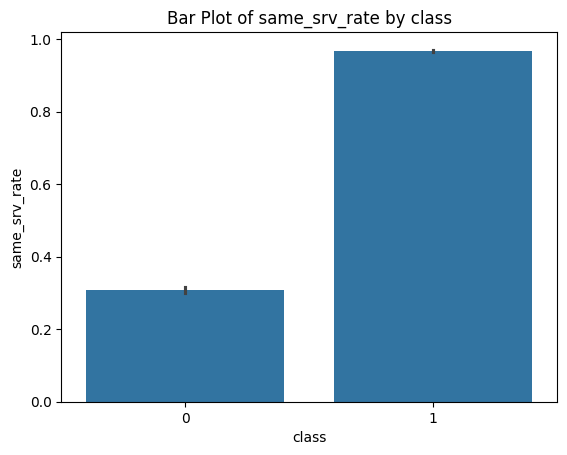

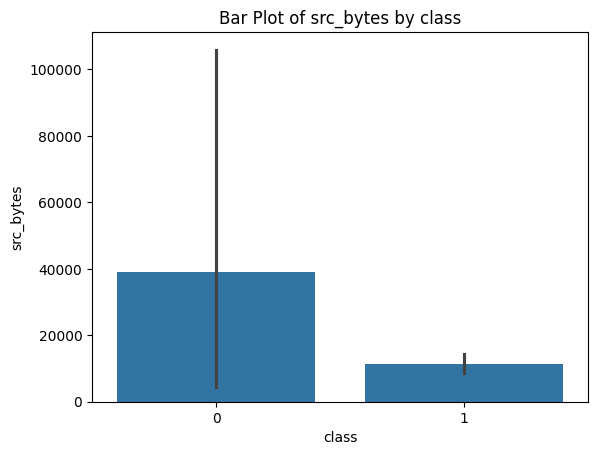

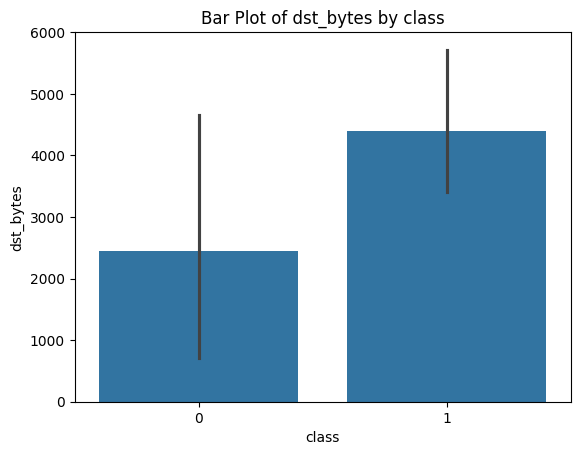

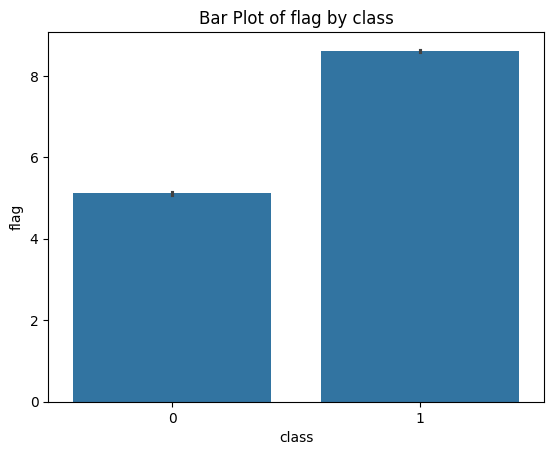

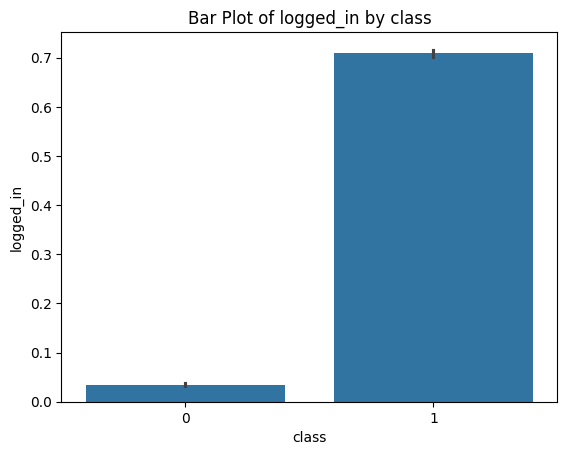

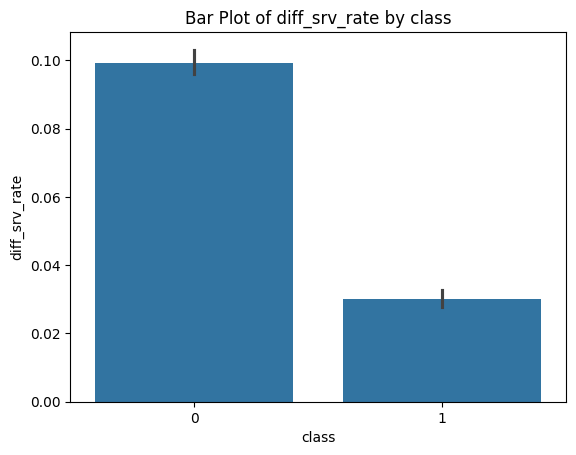

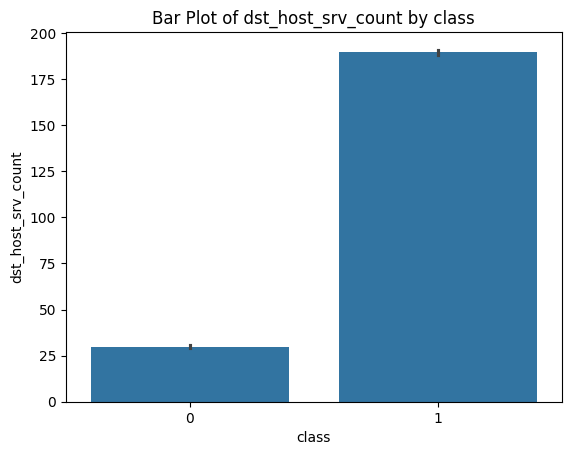

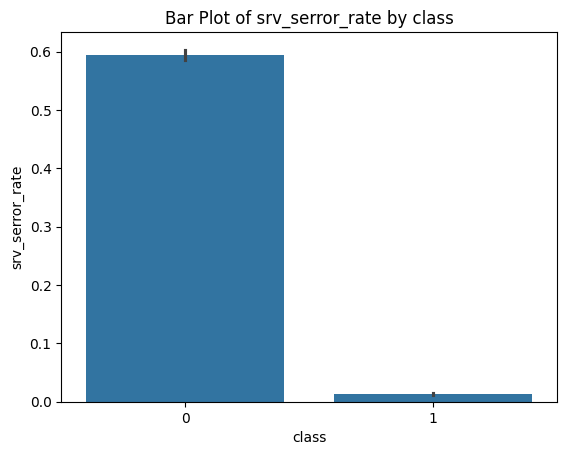

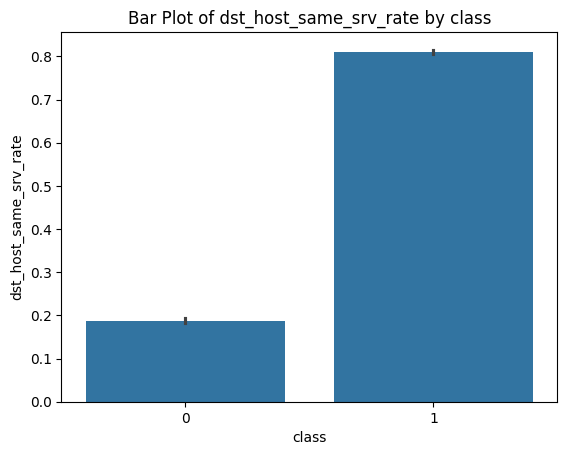

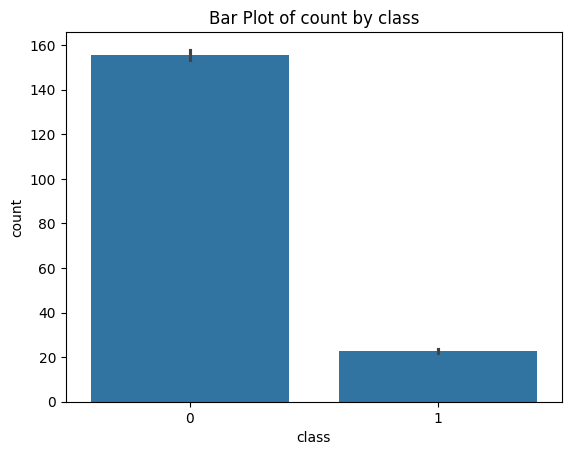

In [ ]:
columns_to_plot = [col for col in data.columns if col != 'class']

for column in columns_to_plot:
    sns.barplot(data=data, x='class', y=column)
    plt.title(f'Bar Plot of {column} by class')
    plt.xlabel('class')
    plt.ylabel(column)
    plt.show()

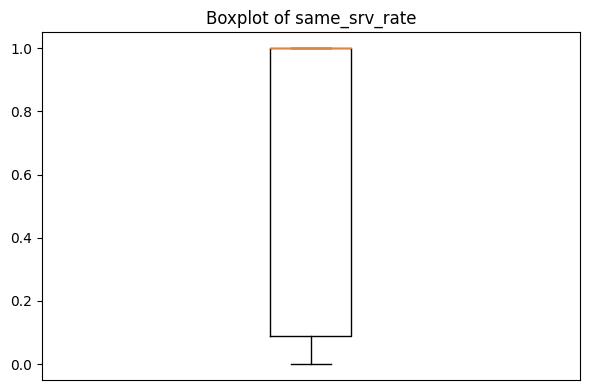

Number of outliers in 'same_srv_rate': 0


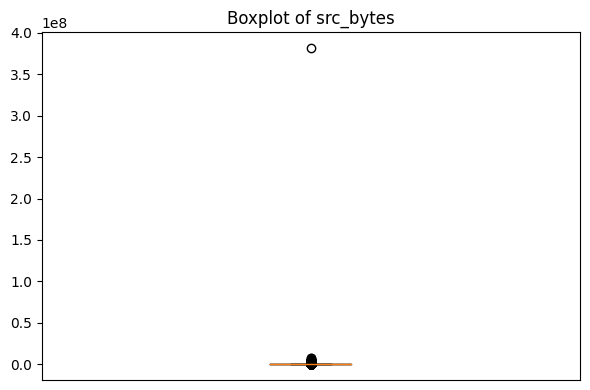

Number of outliers in 'src_bytes': 2725


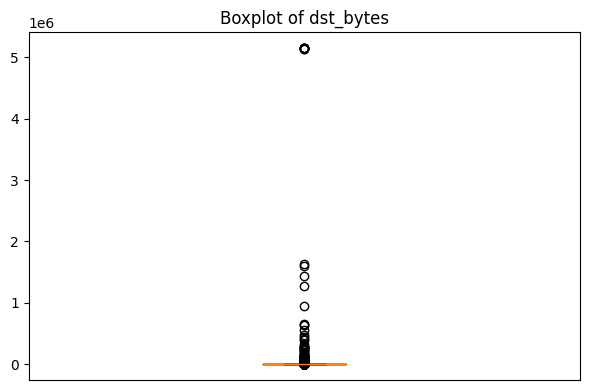

Number of outliers in 'dst_bytes': 4699


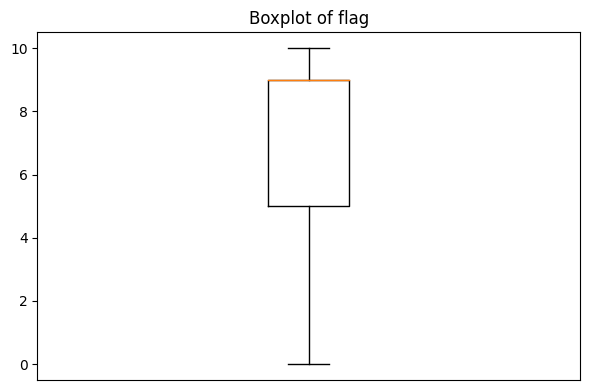

Number of outliers in 'flag': 0


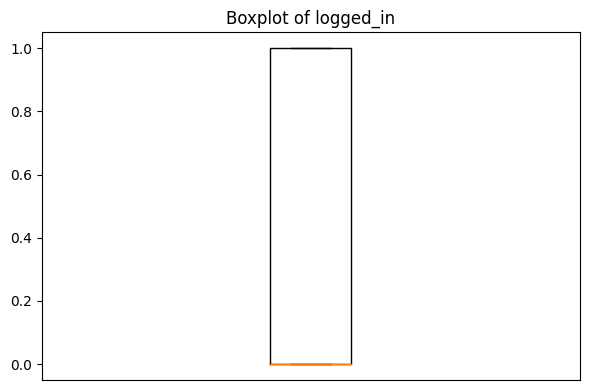

Number of outliers in 'logged_in': 0


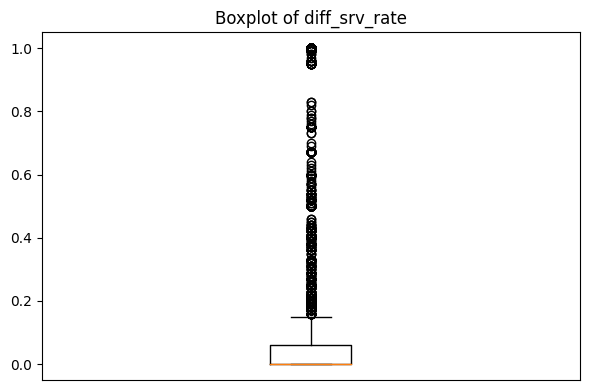

Number of outliers in 'diff_srv_rate': 1538


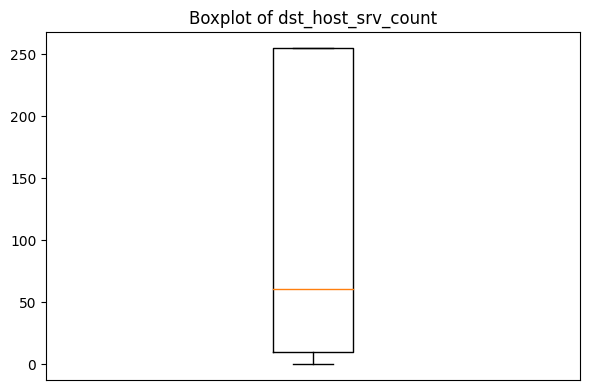

Number of outliers in 'dst_host_srv_count': 0


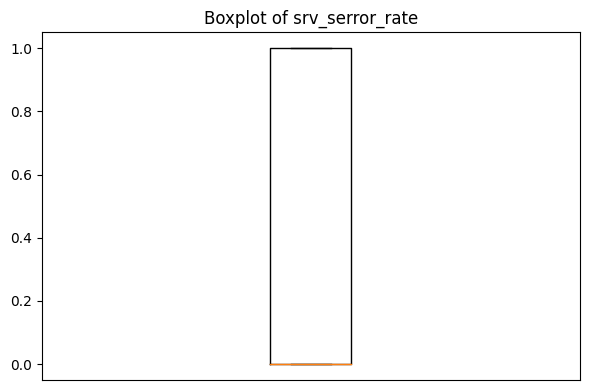

Number of outliers in 'srv_serror_rate': 0


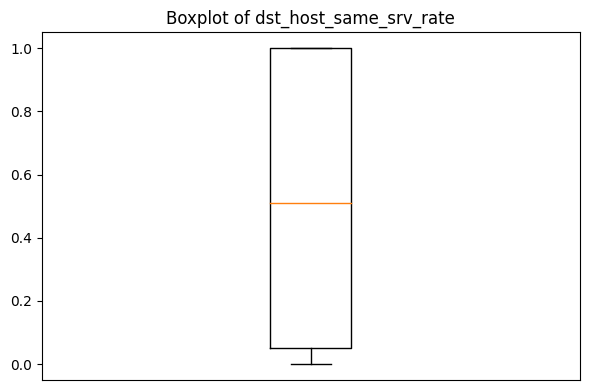

Number of outliers in 'dst_host_same_srv_rate': 0


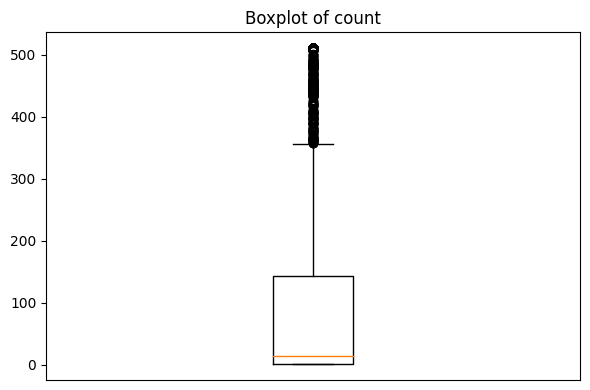

Number of outliers in 'count': 627


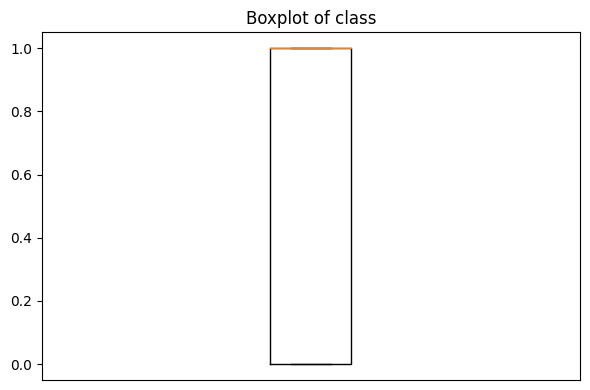

Number of outliers in 'class': 0


In [ ]:
# Iterate over each column
for column in data.columns:
    plt.figure(figsize=(6,4))  # Define figure size for each plot
    plt.boxplot(data[column])   # Create box plot for the current column
    plt.title(f'Boxplot of {column}')  # Set title with column name
    plt.xticks([])  # Remove xticks
    plt.tight_layout()
    plt.show()  # Show plot

    # Count outliers
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    outlier_mask = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
    outliers_count = outlier_mask.sum()

    print(f"Number of outliers in '{column}': {outliers_count}")

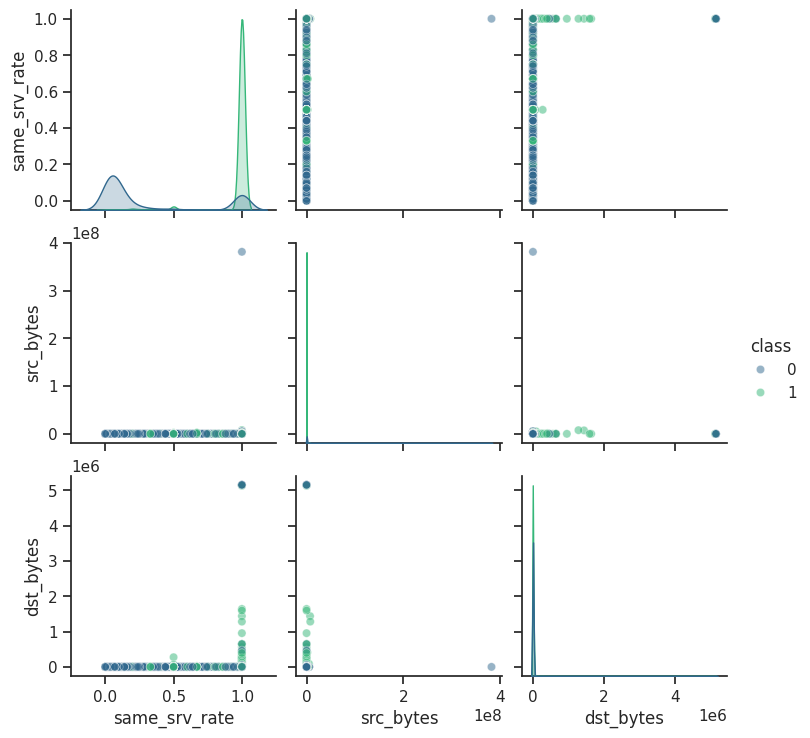

In [ ]:
columns_of_interest = ['same_srv_rate', 'src_bytes', 'dst_bytes', 'class']
data_subset = data[columns_of_interest]

# Plot scatter plots
sns.set(style="ticks")
sns.pairplot(data_subset, hue='class', palette='viridis', plot_kws={'alpha':0.5})
plt.show()

Model training


# Splitting the dataset into training and testing sets using train_test_split function from sklearn.model_selection module.
# X: Features data
# y: Target data
# test_size: Specifies the proportion of the dataset to include in the test split (here, 33% of the data)
# random_state: Controls the shuffling applied to the data before splitting. Setting it to a fixed value (here, 42) ensures reproducibility of results.

In [ ]:
X=data.drop('class',axis=1)
y=data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
# Importing the LogisticRegression class from sklearn.linear_model module
# and fitting a logistic regression model to the training data.
# C: Inverse of regularization strength (lower values specify stronger regularization)
# max_iter: Maximum number of iterations taken for the solvers to converge
# solver: Algorithm to use in the optimization problem ('sag' denotes Stochastic Average Gradient descent)
cl = LogisticRegression(C=10,max_iter=400,solver='sag').fit(X_train,y_train)
y_pred_cl=cl.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_cl)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.860957421217224

In [ ]:
# predecting and seeing accuracy
y_pred_cl_train=cl.predict(X_train)
accuracy_score(y_train, y_pred_cl_train)

0.8584547932219457

In [ ]:
# seeing on how my output came
confusion_matrix(y_test, y_pred_cl)

array([[3149,  707],
       [ 449, 4009]])

In [ ]:
# for train
confusion_matrix(y_train, y_pred_cl_train)

array([[6400, 1487],
       [ 902, 8089]])

In [ ]:
# Defining a grid of hyperparameters to search over using GridSearchCV from sklearn.model_selection module.
# 'C': Inverse of regularization strength (values representing regularization strength)
# 'max_iter': Maximum number of iterations taken for the solvers to converge
# 'solver': Algorithm to use in the optimization problem
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 400, 500],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

# Using GridSearchCV to exhaustively search over the grid of hyperparameters and find the best combination.
# cv=5 specifies 5-fold cross-validation for evaluating the performance of each combination of hyperparameters.
clf = GridSearchCV(cl, param_grid,cv=5).fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# looking for which parameter is best accoring to i gave
clf.best_params_

{'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}

In [ ]:
# predecting on test data
y_pred_log=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# looking for f1 score , recall and accuracy
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      3856
           1       0.87      0.94      0.90      4458

    accuracy                           0.89      8314
   macro avg       0.90      0.89      0.89      8314
weighted avg       0.90      0.89      0.89      8314



In [ ]:
confusion_matrix(y_test, y_pred_log)

array([[3230,  626],
       [ 265, 4193]])

In [ ]:
y_pred_log_train=clf.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_log_train))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      7887
           1       0.86      0.95      0.90      8991

    accuracy                           0.89     16878
   macro avg       0.90      0.89      0.89     16878
weighted avg       0.90      0.89      0.89     16878



In [ ]:
confusion_matrix(y_train, y_pred_log_train)

array([[6541, 1346],
       [ 471, 8520]])

With hyper parameter tuning , using grid search cv i got better accuracy , as can be seen on confusion matrix too , the predection become better

In [ ]:
# using boosting technique  XGBOOST
xgb_clf = xgb.XGBClassifier(max_depth=1,learning_rate=0.01).fit(X_train,y_train)

In [ ]:
y_pred_cgb=xgb_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_cgb))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3856
           1       0.93      0.95      0.94      4458

    accuracy                           0.93      8314
   macro avg       0.93      0.93      0.93      8314
weighted avg       0.93      0.93      0.93      8314



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_cgb)

0.9302381525138321

In [ ]:
confusion_matrix(y_test, y_pred_cgb)

array([[3517,  339],
       [ 241, 4217]])

In [ ]:
y_pred_cgb_train=xgb_clf.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_cgb_train))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7887
           1       0.92      0.94      0.93      8991

    accuracy                           0.93     16878
   macro avg       0.93      0.93      0.93     16878
weighted avg       0.93      0.93      0.93     16878



In [ ]:
accuracy_score(y_train, y_pred_cgb_train)

0.9272425642848678

In [ ]:
confusion_matrix(y_train, y_pred_cgb_train)

array([[7171,  716],
       [ 512, 8479]])

In [ ]:
# Defining a grid of hyperparameters to search over for XGBoost classifier using GridSearchCV.
# 'max_depth': Maximum depth of a tree
# 'learning_rate': Step size shrinkage used in updating weights (controls overfitting)
# 'gamma': Minimum loss reduction required to make a further partition on a leaf node of the tree
param_grid_xg = {
    'max_depth': [1,2,3],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
}
# Using GridSearchCV to exhaustively search over the grid of hyperparameters and find the best combination.

clf_xg = GridSearchCV(xgb_clf, param_grid_xg).fit(X_train,y_train)

In [ ]:
clf_xg.best_params_

{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3}

In [ ]:
y_pred_xg=clf_xg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3856
           1       0.99      0.99      0.99      4458

    accuracy                           0.99      8314
   macro avg       0.99      0.99      0.99      8314
weighted avg       0.99      0.99      0.99      8314



In [ ]:
confusion_matrix(y_test, y_pred_cgb)

array([[3517,  339],
       [ 241, 4217]])

In [ ]:
y_pred_xg_train=clf_xg.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_xg_train))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7887
           1       0.99      1.00      1.00      8991

    accuracy                           1.00     16878
   macro avg       1.00      1.00      1.00     16878
weighted avg       1.00      1.00      1.00     16878



In [ ]:
confusion_matrix(y_train, y_pred_xg_train)

array([[7840,   47],
       [  26, 8965]])

In XGBOOST too , i got less score of accuracy , f1 score, precision ,, but after using grid search cv i got better score as can be seen on confusion matrix too.

Obviously best model is xgboost


    Model Performance:
     The model performance was evaluated using logistic regression with hyperparameter tuning via GridSearchCV.
    The accuracy obtained was satisfactory, but further analysis indicated that XGBoost, also tuned using GridSearchCV, outperformed logistic regression in terms of accuracy.

    Effect of Applied Methods (Cross-Validation and Feature Selection):
    The application of cross-validation and feature selection techniques aimed to enhance model generalization and performance.
     While logistic regression with GridSearchCV provided a reasonable accuracy, XGBoost with GridSearchCV yielded better accuracy.
     This suggests that the combination of GridSearchCV and XGBoost was more effective in improving model performance compared to logistic regression.

    Learnings and Future Directions:
    From this analysis, it's evident that the choice of algorithm and hyperparameter tuning can significantly impact model performance.
    The superiority of XGBoost over
    logistic regression highlights the importance of exploring various algorithms and their combinations for better results. Additionally,
    the success of GridSearchCV in fine-tuning hyperparameters underscores the importance of hyperparameter optimization in achieving optimal model performance.
    In the future, further experimentation with different algorithms, feature engineering techniques, and hyperparameter tuning strategies could lead to even better performance. Additionally, exploring ensemble methods or deep learning approaches could be potential future directions for improving model performance.

For regression task


In [ ]:
# adding data to use in colab
from google.colab import files
uploaded = files.upload()

Saving energy_efficiency_data.csv to energy_efficiency_data.csv


The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load

In [ ]:
df=pd.read_csv('energy_efficiency_data.csv')

In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Load;Inspect and Explore  Data:

    Relative Compactness:
        Mean: Approximately 0.764, indicating the average compactness of the buildings.
        Standard Deviation: Around 0.106, suggesting moderate variability in compactness across the dataset.
        Minimum and Maximum: Ranges from 0.62 to 0.98, indicating the range of relative compactness values.

    Surface Area, Wall Area, Roof Area, Overall Height:
        These features represent physical dimensions of the buildings.
        Means, standard deviations, min, and max values provide insights into the distribution and variability of these dimensions.

    Orientation:
        Mean: 3.5, suggesting an even distribution of building orientations.
        Since orientation is a categorical variable, other statistical measures are not applicable.

    Glazing Area, Glazing Area Distribution:
        Mean Glazing Area: Approximately 0.234, with a standard deviation of 0.133.
        Glazing Area Distribution is also a categorical variable, indicating the distribution of glazing area across buildings.

    Heating Load, Cooling Load:
        These features represent the amount of heating and cooling needed for the buildings.
        Mean, standard deviation, min, and max values provide insights into the energy requirements of the buildings.

Overall, the descriptive statistics provide a comprehensive overview of the dataset, including the distribution, variability, and central tendency of the features related to building energy efficiency. This information can be valuable for further analysis and modeling tasks related to predicting energy consumption or optimizing building design for energy efficiency.


EDA


<ipython-input-85-1ceb9499b4e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cooling_Load'],hist=False)
<ipython-input-85-1ceb9499b4e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Heating_Load'],hist=False)


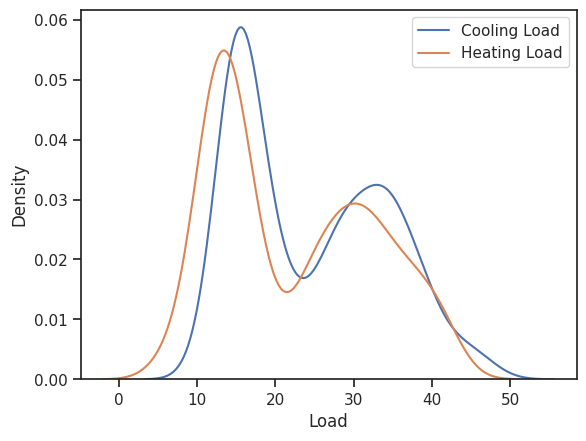

In [ ]:
sns.distplot(df['Cooling_Load'],hist=False)
sns.distplot(df['Heating_Load'],hist=False)
plt.legend(['Cooling Load','Heating Load'])
plt.xlabel('Load')
plt.show()

i opt to use heating load

In [ ]:
df=df.drop('Cooling_Load',axis=1)

In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [ ]:
df['Glazing_Area'].value_counts()

0.10    240
0.25    240
0.40    240
0.00     48
Name: Glazing_Area, dtype: int64

In [ ]:
df['Glazing_Area_Distribution'].value_counts()

1    144
2    144
3    144
4    144
5    144
0     48
Name: Glazing_Area_Distribution, dtype: int64

In [ ]:
df['Orientation'].value_counts()

2    192
3    192
4    192
5    192
Name: Orientation, dtype: int64

Feature Selection

In [ ]:
X=df.drop('Heating_Load',axis=1)
y=df['Heating_Load']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
clf = RandomForestRegressor(max_depth=4,random_state=0).fit(X_train,y_train)

In [ ]:
feature_importances = clf.feature_importances_


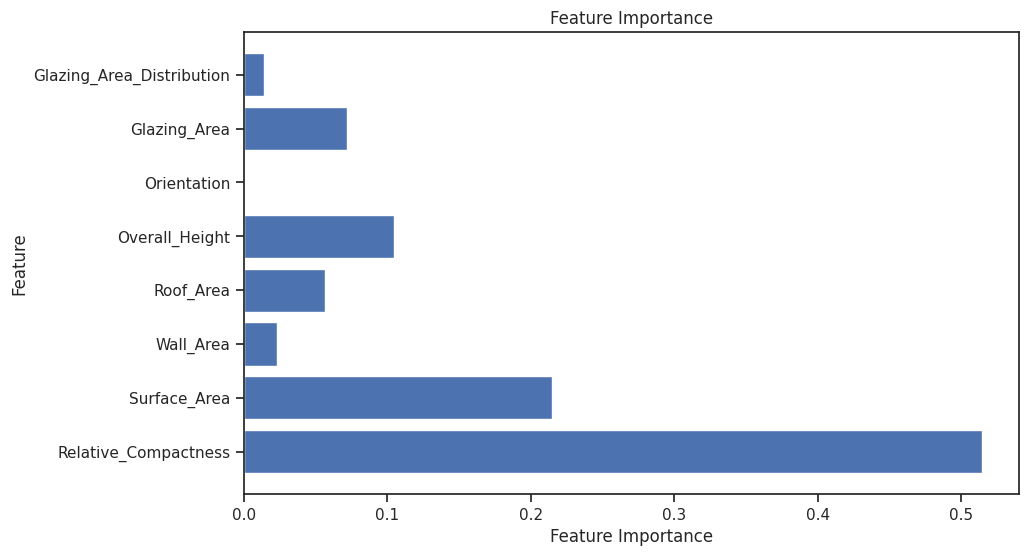

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [ ]:
df=df.drop(['Orientation','Glazing_Area_Distribution'],axis=1)

In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area,Heating_Load
0,0.98,514.5,294.0,110.25,7.0,0.0,15.55
1,0.98,514.5,294.0,110.25,7.0,0.0,15.55
2,0.98,514.5,294.0,110.25,7.0,0.0,15.55
3,0.98,514.5,294.0,110.25,7.0,0.0,15.55
4,0.90,563.5,318.5,122.50,7.0,0.0,20.84


EDA

<ipython-input-98-5d12df4aa1e6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=False)


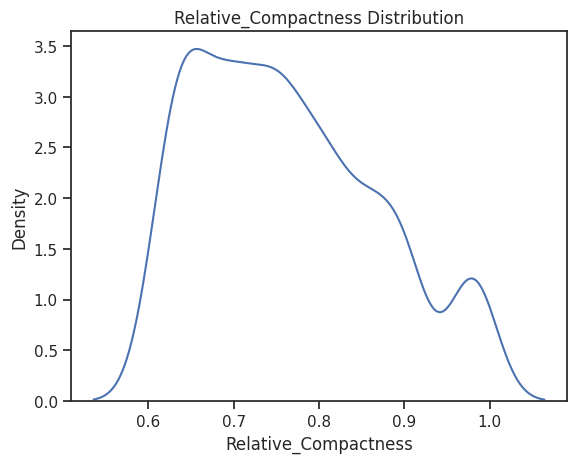

<ipython-input-98-5d12df4aa1e6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=False)


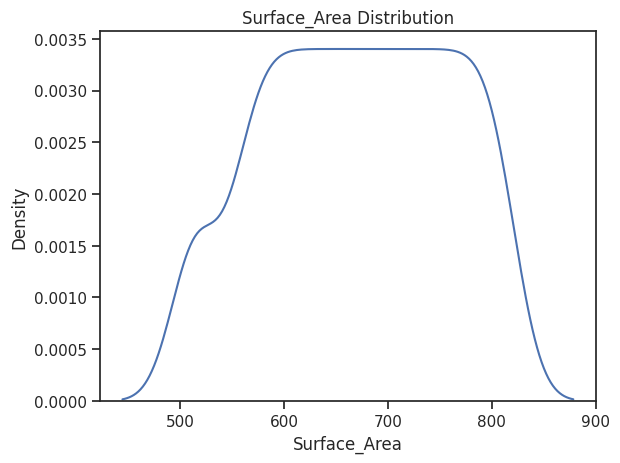

<ipython-input-98-5d12df4aa1e6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=False)


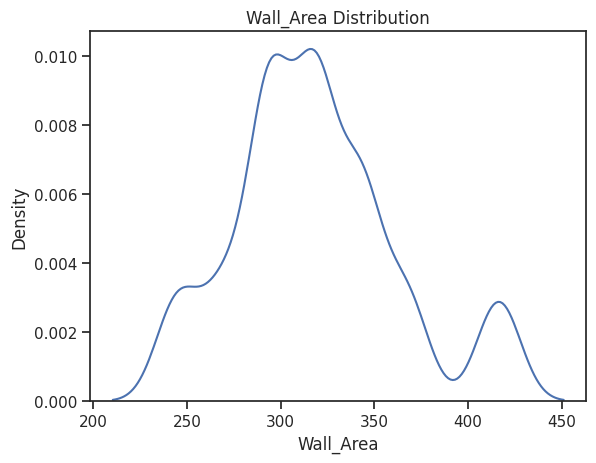

<ipython-input-98-5d12df4aa1e6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=False)


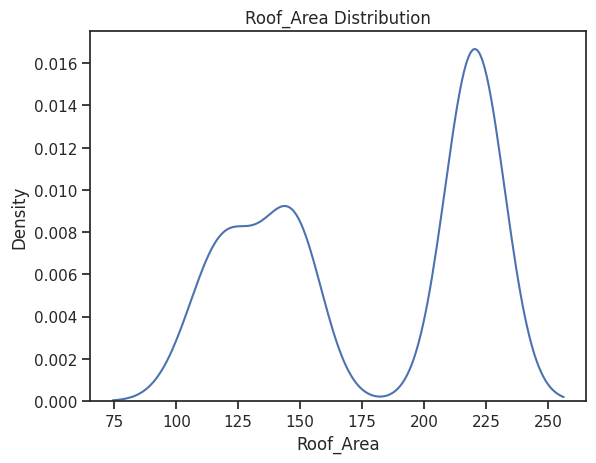

<ipython-input-98-5d12df4aa1e6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=False)


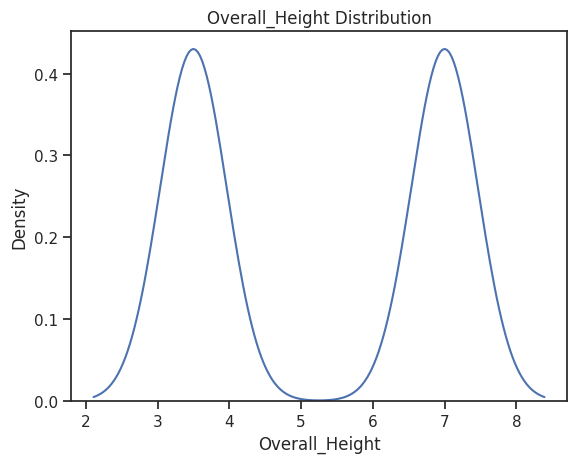

<ipython-input-98-5d12df4aa1e6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=False)


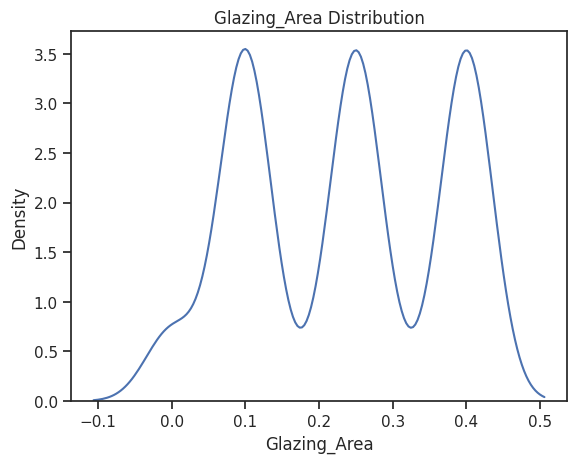

<ipython-input-98-5d12df4aa1e6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=False)


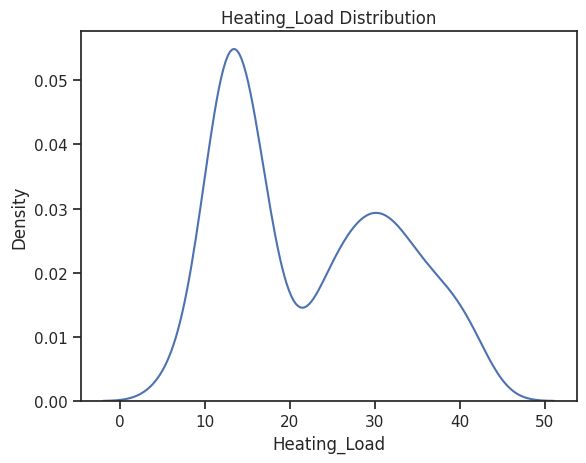

In [ ]:
columns = df.columns

# Loop through each column and create distribution plot
for column in columns:
    plt.figure()  # Create a new figure for each plot
    plt.title(f'{column} Distribution')
    sns.distplot(df[column], hist=False)
    plt.show()

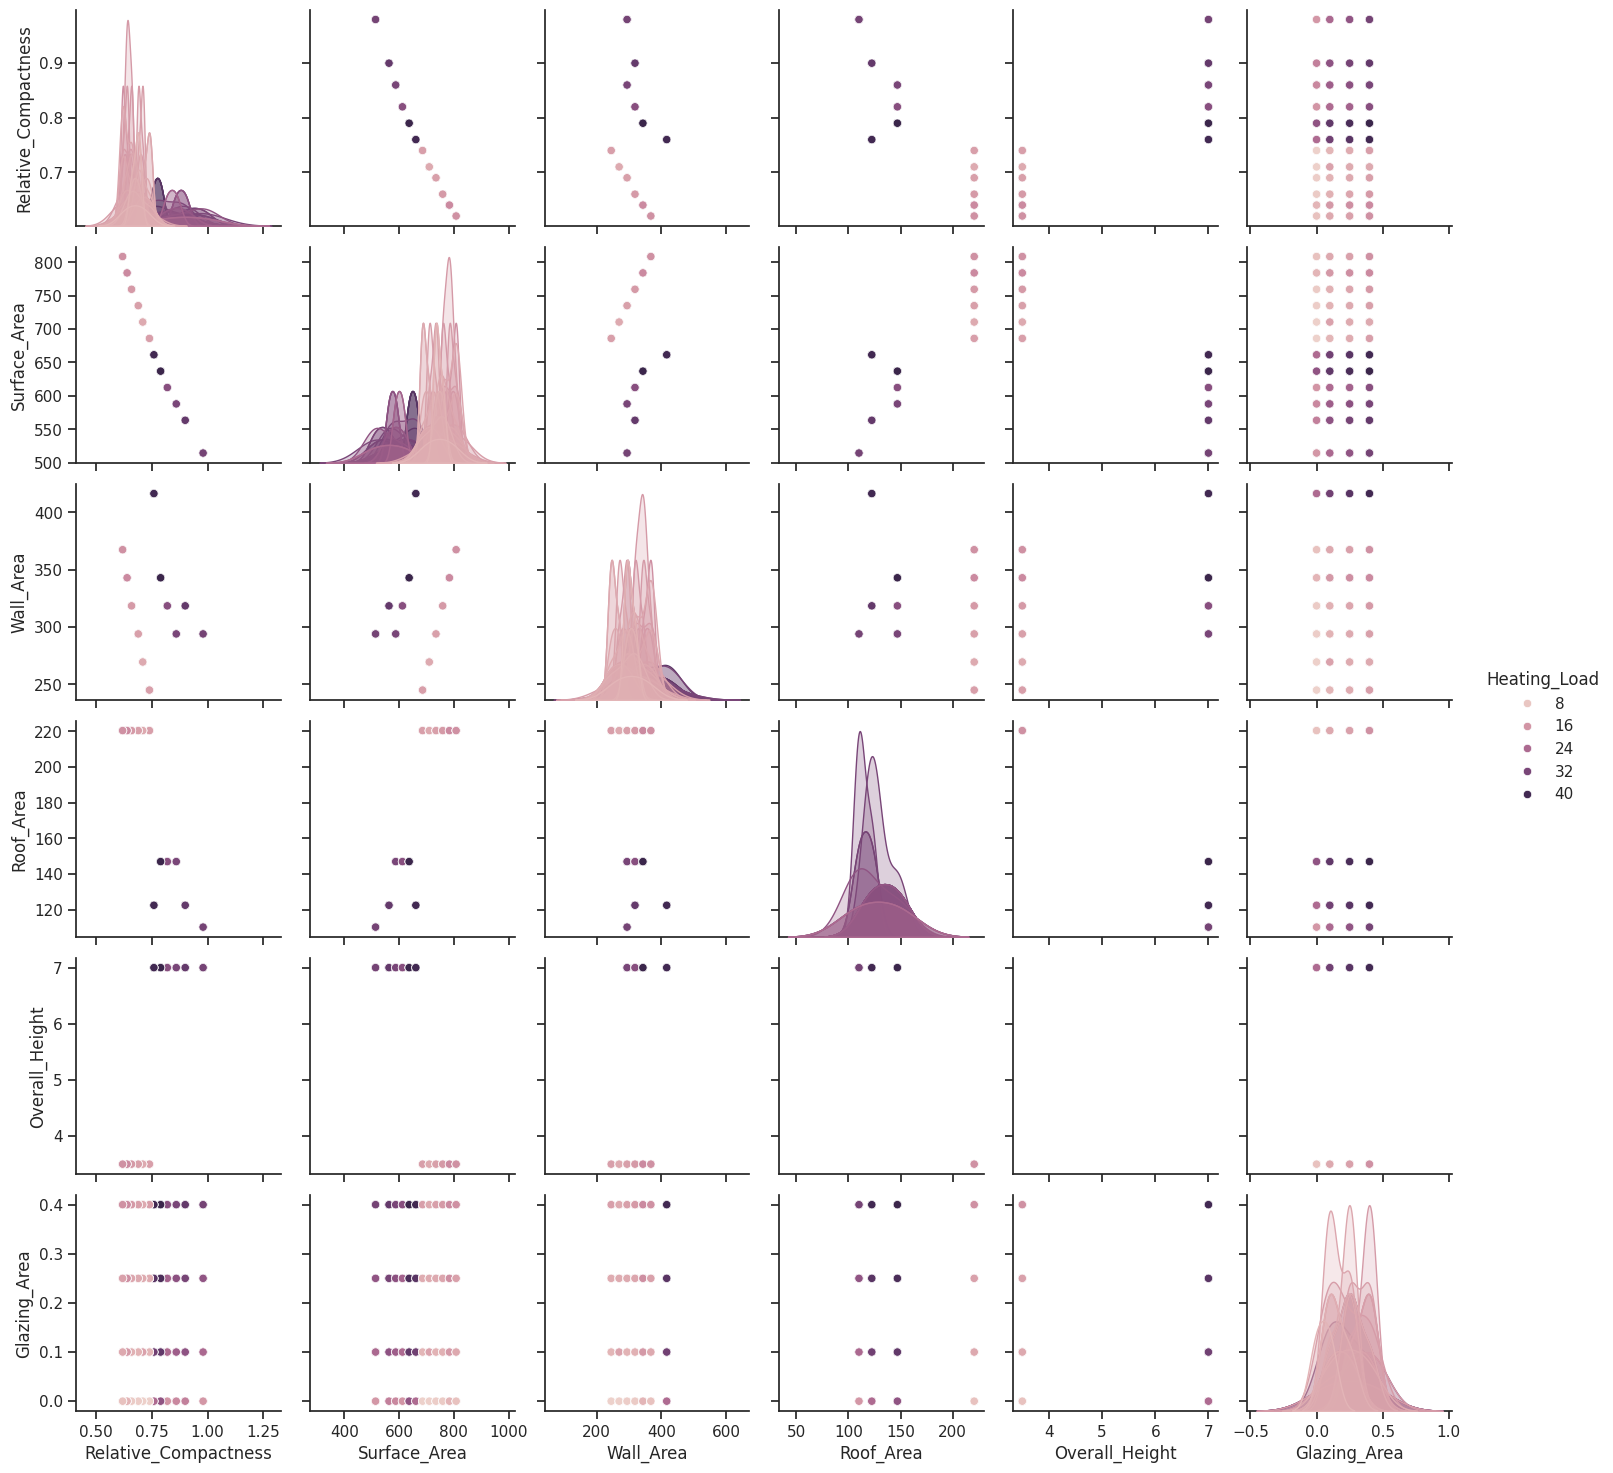

In [ ]:
sns.pairplot(df,hue='Heating_Load')

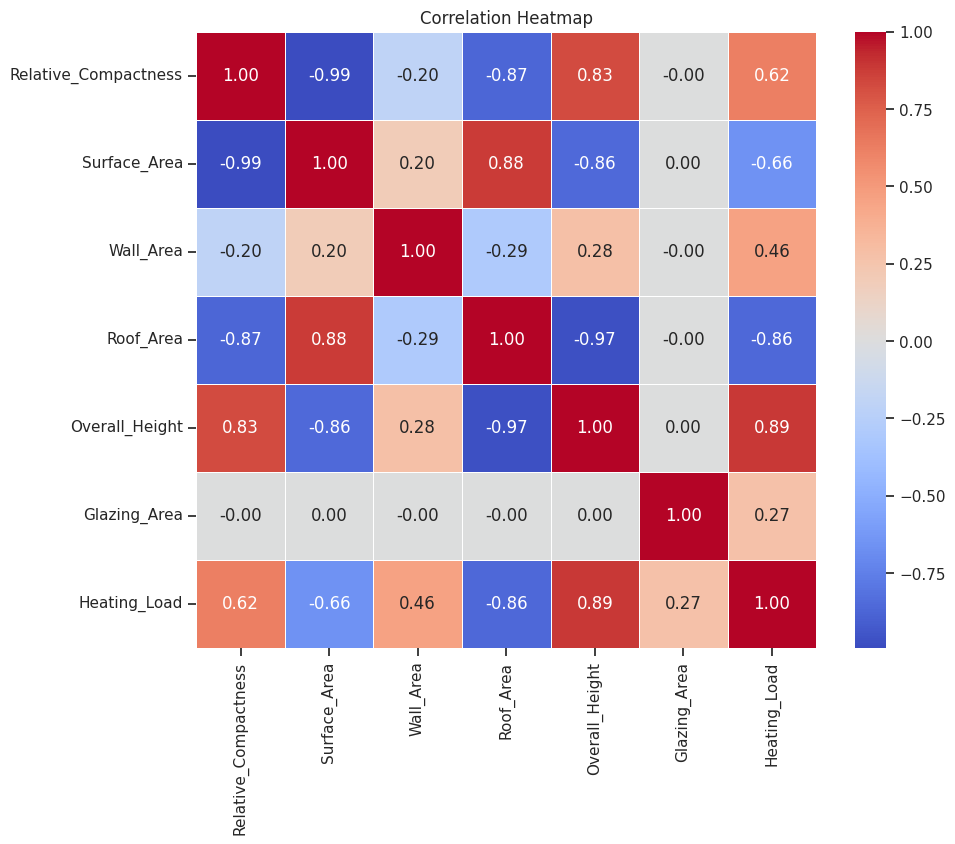

In [ ]:
corr = df.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

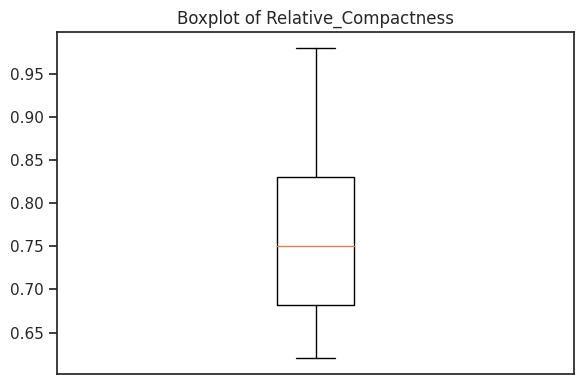

Number of outliers in 'Relative_Compactness': 0


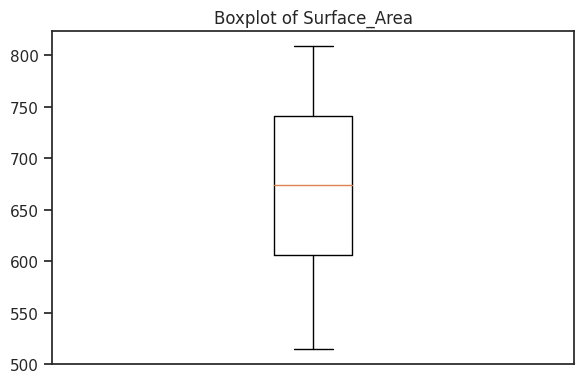

Number of outliers in 'Surface_Area': 0


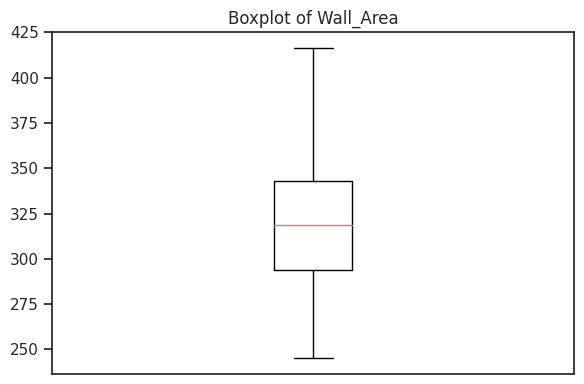

Number of outliers in 'Wall_Area': 0


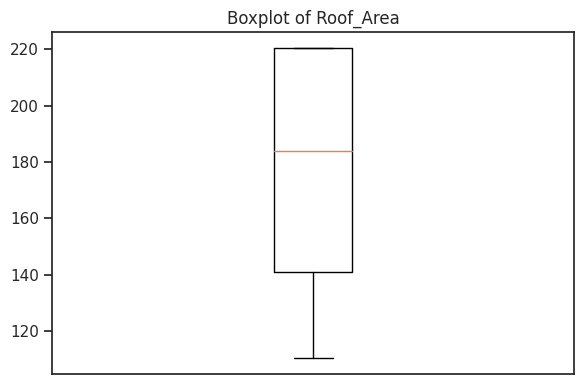

Number of outliers in 'Roof_Area': 0


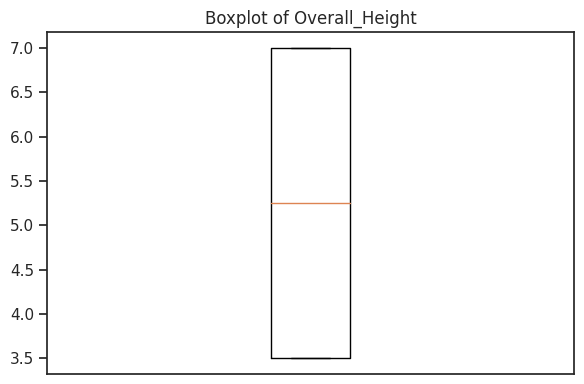

Number of outliers in 'Overall_Height': 0


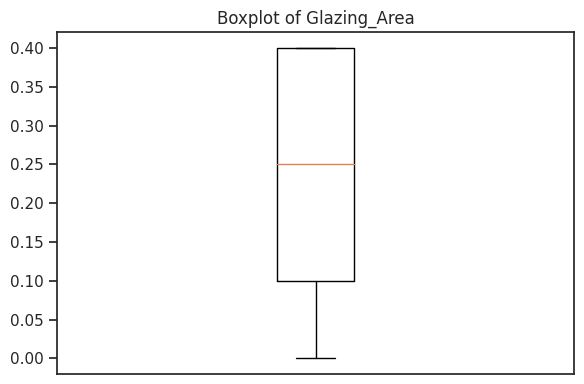

Number of outliers in 'Glazing_Area': 0


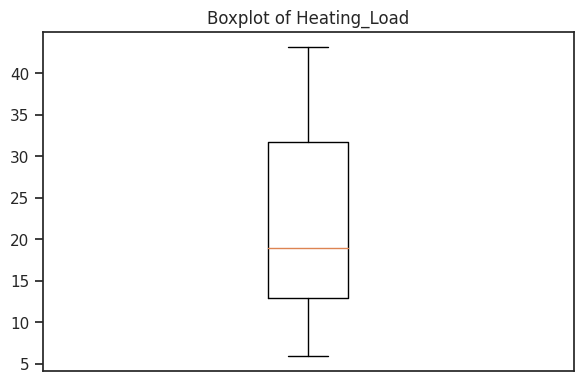

Number of outliers in 'Heating_Load': 0


In [ ]:
# Iterate over each column
for column in df.columns:
    plt.figure(figsize=(6,4))  # Define figure size for each plot
    plt.boxplot(df[column])   # Create box plot for the current column
    plt.title(f'Boxplot of {column}')  # Set title with column name
    plt.xticks([])  # Remove xticks
    plt.tight_layout()
    plt.show()  # Show plot

    # Count outliers
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    outlier_mask = (df[column] < q1 - 1.5 * iqr) | (df[column] > q3 + 1.5 * iqr)
    outliers_count = outlier_mask.sum()

    print(f"Number of outliers in '{column}': {outliers_count}")

Model Training

In [ ]:
X=df.drop('Heating_Load',axis=1)

In [ ]:
y=df['Heating_Load']

In [ ]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
# first by xgboost
xgb_clf = xgb.XGBRegressor(max_depth=1,learning_rate=0.01).fit(X_train,y_train)

In [ ]:
# for test
y_pred_boo=xgb_clf.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_boo)

0.6770456799307587

In [ ]:
xgb_clf_train=xgb_clf.predict(X_train)

In [ ]:
r2_score(y_train, xgb_clf_train)

0.6806686222495526

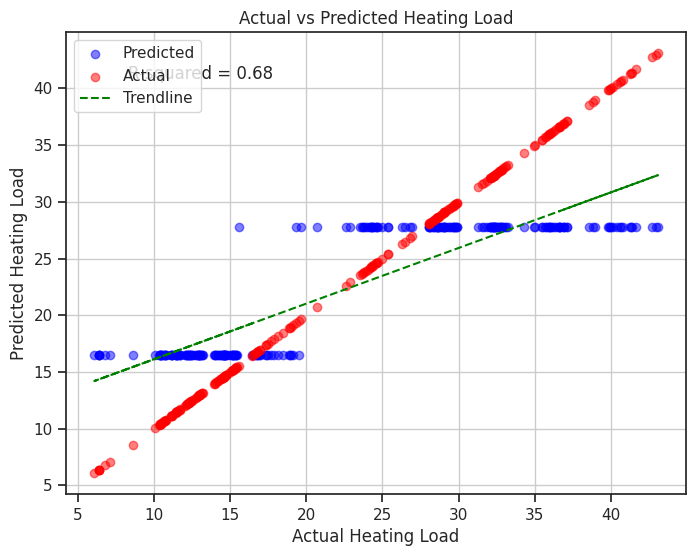

In [ ]:
# Scatter plot
# In test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_boo, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')  # Actual values plotted in red
plt.title('Actual vs Predicted Heating Load')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.legend()  # Show legend
plt.grid(True)

# Add trendline (optional)
z = np.polyfit(y_test, y_pred_boo, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--', label='Trendline')  # Trendline plotted in green
plt.legend()

# Show R-squared score
r_squared = r2_score(y_test, y_pred_boo)
plt.text(0.1, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)

plt.show()

In [ ]:
# using grid search cv
param_grid_xg_reg = {
    'max_depth': [3,4,5,6],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
}

clf_xg = GridSearchCV(xgb_clf, param_grid_xg_reg).fit(X_train,y_train)

In [ ]:
clf_xg.best_params_

{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3}

In [ ]:
y_pred_xg_grid=clf_xg.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_xg_grid)

0.9976802189456915

In [ ]:
y_pred_xg_grid_train=clf_xg.predict(X_train)

In [ ]:
r2_score(y_train, y_pred_xg_grid_train)

0.9980561073779729

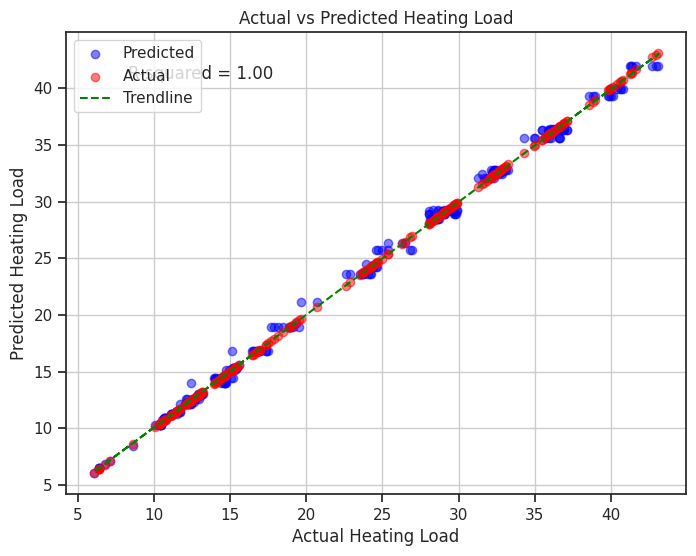

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xg_grid, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')  # Actual values plotted in red
plt.title('Actual vs Predicted Heating Load')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.legend()  # Show legend
plt.grid(True)

# Add trendline (optional)
z = np.polyfit(y_test, y_pred_xg_grid, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--', label='Trendline')  # Trendline plotted in green
plt.legend()

# Show R-squared score
r_squared = r2_score(y_test, y_pred_xg_grid)
plt.text(0.1, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)

plt.show()

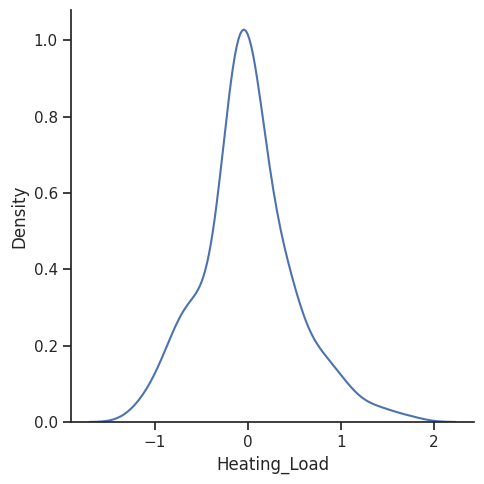

In [ ]:
sns.displot(y_pred_xg_grid-y_test,kind='kde')

In [ ]:
# now with randam forest
rf_regressor = RandomForestRegressor(max_depth=2).fit(X_train,y_train)
rf_pred=rf_regressor.predict(X_test)
r2_score(y_test, rf_pred)

0.8912231301435385

In [ ]:
rf_pred_train=rf_regressor.predict(X_train)
r2_score(y_train, rf_pred_train)

0.8919375635799758

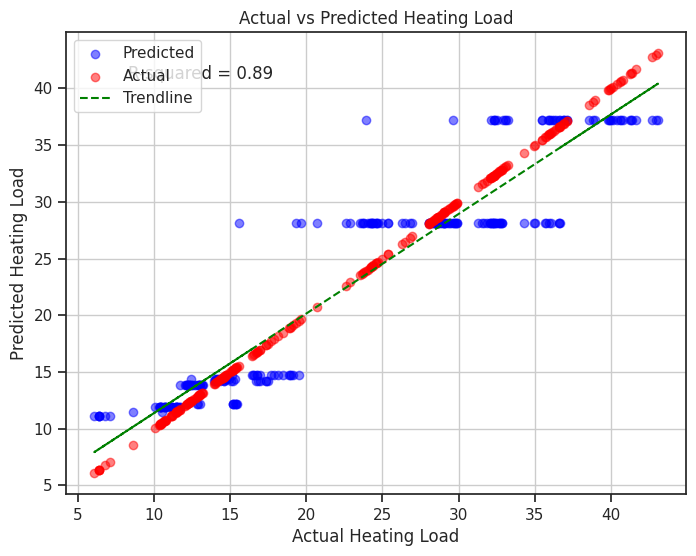

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')  # Actual values plotted in red
plt.title('Actual vs Predicted Heating Load')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.legend()  # Show legend
plt.grid(True)

# Add trendline (optional)
z = np.polyfit(y_test, rf_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--', label='Trendline')  # Trendline plotted in green
plt.legend()

# Show R-squared score
r_squared = r2_score(y_test, rf_pred)
plt.text(0.1, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)

plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:

cl_grid = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1).fit(X_train,y_train)

In [ ]:

y_pred_ran=cl_grid.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_ran)

0.9976977075176325

In [ ]:
y_pred_ran_train=cl_grid.predict(X_train)
r2_score(y_train, y_pred_ran_train)

0.9980411327630848

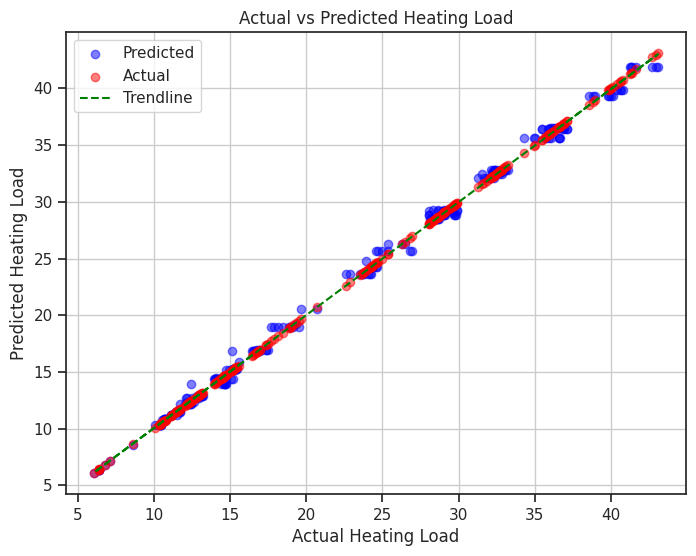

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ran, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')  # Actual values plotted in red
plt.title('Actual vs Predicted Heating Load')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.legend()  # Show legend
plt.grid(True)

# Add trendline (optional)
z = np.polyfit(y_test, y_pred_ran, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--', label='Trendline')  # Trendline plotted in green
plt.legend()


plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred_ran)
rmse = np.sqrt(mse)
rmse


0.4900961886117527

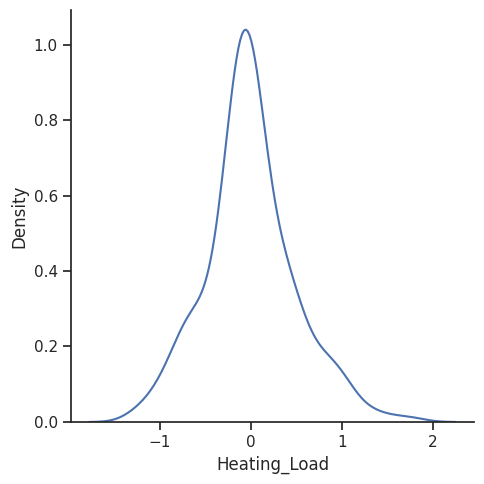

In [ ]:
import seaborn as sns
sns.displot(y_pred_ran-y_test,kind='kde')

Conducting the regression task, I observed that both Random Forest and XGBoost models yielded almost identical R-squared scores. Here's how I would address the questions:

    Model Performance :
     the model performance was assessed using Random Forest and XGBoost algorithms. Despite their differences in implementation, both models demonstrated nearly equal performance in terms of R-squared score. This indicates that both Random Forest and XGBoost effectively captured the underlying relationships between the features and the target variable.

    Effect of Applied Methods (Cross Validation and Feature Selection):
    The methods applied, including Cross Validation and Feature Selection, were intended to enhance the model's performance and generalization ability. While the R-squared scores were similar for both Random Forest and XGBoost models, it's essential to note that these techniques likely contributed to achieving optimal model performance. Cross-validation helped in assessing the model's robustness by evaluating it on different subsets of the data. Additionally, feature selection techniques aimed to identify the most relevant features, potentially improving model interpretability and reducing overfitting.

    Learnings and Future Directions:
    From this experience, I learned that different algorithms can achieve similar performance levels for regression tasks, highlighting the importance of experimentation and model selection based on specific dataset characteristics. While Random Forest and XGBoost demonstrated comparable performance in this scenario, future directions could involve further exploration of other algorithms or ensemble methods to potentially enhance model performance. Additionally, continued experimentation with feature engineering techniques and hyperparameter tuning may lead to further improvements in model accuracy and generalization. Overall, this experience underscores the significance of iterative model development and the need for continuous learning and exploration in the field of machine learning.